<a href="https://colab.research.google.com/github/Gail529/Machine-Learning-/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data=pd.read_csv("/mall.csv")

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data = pd.get_dummies(data, columns=['Gender'])


In [ ]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [ ]:
data.rename(columns={'Annual Income (k$)':'income'},inplace=True)

In [ ]:
data.rename(columns={'Spending Score (1-100)':'spending'},inplace=True)

In [ ]:
data

,CustomerID,Age,income,spending,Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


<function matplotlib.pyplot.show>

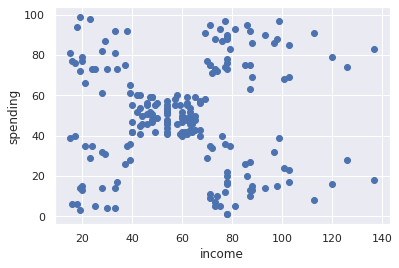

In [ ]:
plt.scatter(data['income'],data['spending'])
plt.xlabel('income')
plt.ylabel('spending')
plt.show


No handles with labels found to put in legend.


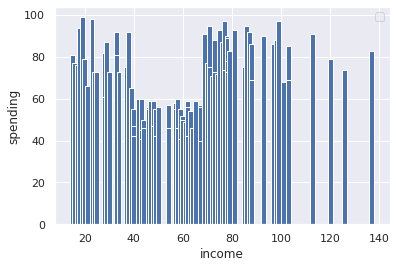

In [ ]:
plt.bar(data['income'],data['spending'],width=2)
plt.legend()
plt.xlabel('income')
plt.ylabel('spending')
plt.show()

In [ ]:
x=data.copy()

No handles with labels found to put in legend.


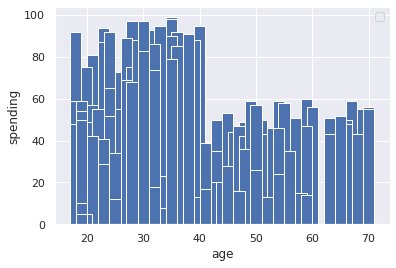

In [ ]:
plt.bar(data['Age'],data['spending'],width=2)
plt.legend()
plt.xlabel('age')
plt.ylabel('spending')
plt.show()

In [ ]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(data)
x_scaled

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148, -1.12815215,
         1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407, -1.12815215,
         1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298,  0.88640526,
        -0.88640526],
       ...,
       [ 1.68877065, -0.49160182,  2.49780745,  0.92395314, -1.12815215,
         1.12815215],
       [ 1.70609137, -0.49160182,  2.91767117, -1.25005425, -1.12815215,
         1.12815215],
       [ 1.7234121 , -0.6351352 ,  2.91767117,  1.27334719, -1.12815215,
         1.12815215]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,30):
  k=KMeans(i)
  k.fit(x_scaled)
  wcss.append(k.inertia_)
  wcss

<function matplotlib.pyplot.show>

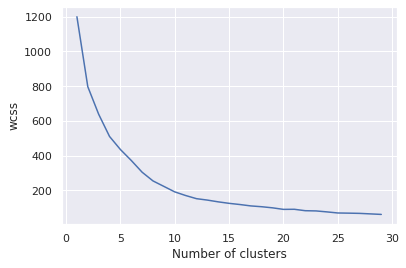

In [ ]:
plt.plot(range(1,30),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show

In [ ]:
kmeans=KMeans(5)
kmeans.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_pred']=kmeans.fit_predict(x_scaled)
cluster_new

,CustomerID,Age,income,spending,Gender_Female,Gender_Male,cluster_pred
0,1,19,15,39,0,1,1
1,2,21,15,81,0,1,1
2,3,20,16,6,1,0,3
3,4,23,16,77,1,0,3
4,5,31,17,40,1,0,3
...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0
196,197,45,126,28,1,0,0
197,198,32,126,74,0,1,2
198,199,32,137,18,0,1,2


<function matplotlib.pyplot.show>

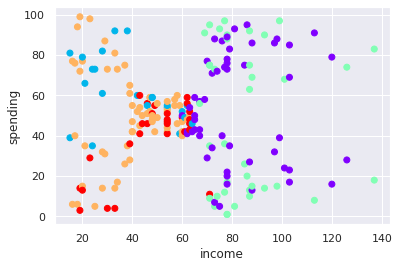

In [ ]:
plt.scatter(cluster_new['income'],cluster_new['spending'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('income')
plt.ylabel('spending')
plt.show